# Pacotes e configurações

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Carregamento de Dados

In [2]:
data = fetch_california_housing()

In [3]:
X = pd.DataFrame(data.data, columns = data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y = pd.Series(data.target, name = 'target')
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [6]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [7]:
X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


# EDA

### Histograma dos preços

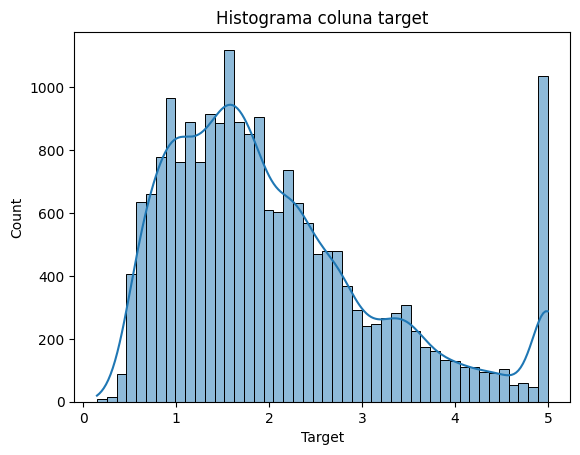

In [8]:
sns.histplot(x=y, kde=True)
plt.title("Histograma coluna target")
plt.xlabel("Target")
plt.show()

### Boxplot das colunas

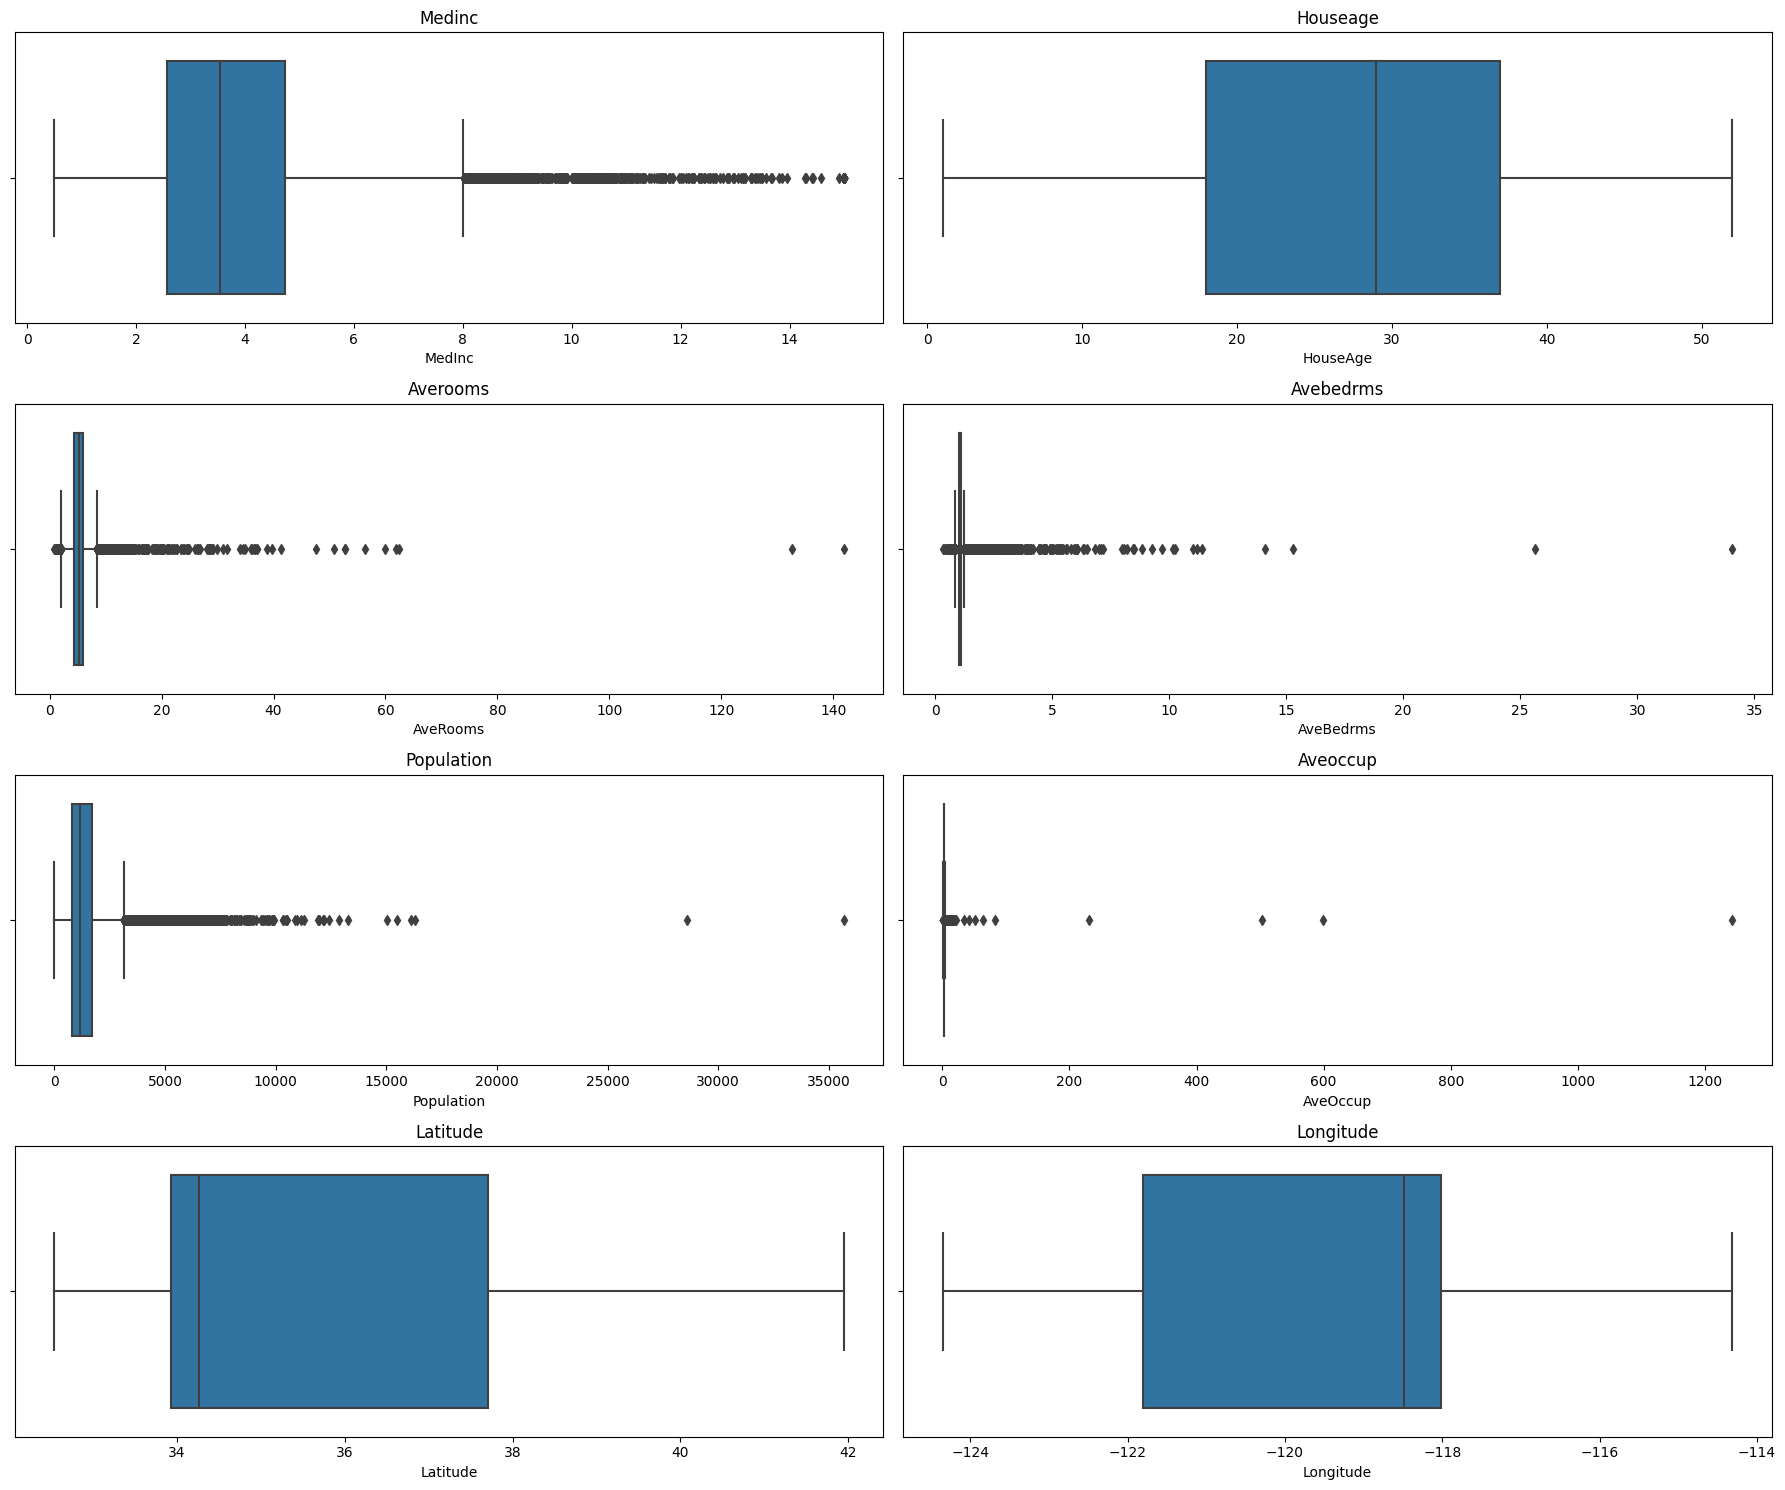

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(18, 15))
ax = ax.ravel()
for i, col in enumerate(X.select_dtypes('number')):
        sns.boxplot(x=X[col], ax=ax[i])
        ax[i].set_title(col.capitalize())
plt.tight_layout()
plt.show()

# Escalonamento dos dados

In [13]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Separação dos dados em treino e teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

# Treinando os modelos

## Funções para output dos resultados

In [56]:
def metricas(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics_dict = {
        "Mean Squared Error (MSE)": [mse],
        "Root Mean Squared Error (RMSE)": [rmse],
        "Mean Absolute Error (MAE)": [mae],
        "Mean Absolute Percentage Error (MAPE)": [mape],
        "R-squared (R2)": [r2]
    }
    
    metrics_df = pd.DataFrame(metrics_dict, index=[model_name])
    return metrics_df

In [16]:
def grafico_regressao(y_pred, model):
    y_pred_serie = pd.Series(y_pred)
    y_test_serie = y_test.copy()
    y_pred_serie.reset_index(drop=True, inplace=True)
    y_test_serie.reset_index(drop=True, inplace=True)
    df_grafico = pd.DataFrame({'Valores Preditos': y_pred_serie.values, 'Valores Reais': y_test_serie.values})
    sns.lmplot(data=df_grafico, x="Valores Preditos", y="Valores Reais", ci=None, line_kws={"color": "red"}, height=5, aspect=2)
    plt.title(f"Valor predito vs Valor real: Modelo {model}")
    plt.xlabel("Valores preditos")
    plt.ylabel("Valores Reais")
    plt.show()

## Regressão Linear

### Hiperparâmetros modificados:
 - **N_jobs**: Quantidade de processadores utilizados pelo computador ao realizar os calculos do modelo.

In [17]:
reg = linear_model.LinearRegression(n_jobs=-1)

In [18]:
%%time
reg.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 6.01 ms


LinearRegression(n_jobs=-1)

In [107]:
tempo_reg = 6.01

In [19]:
y_reg_pred = reg.predict(X_test)

In [57]:
metricas1 = metricas(y_test, y_reg_pred, 'Reg_linear')
metricas1

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2)
Reg_linear,0.530568,0.728401,0.527247,0.317503,0.59577


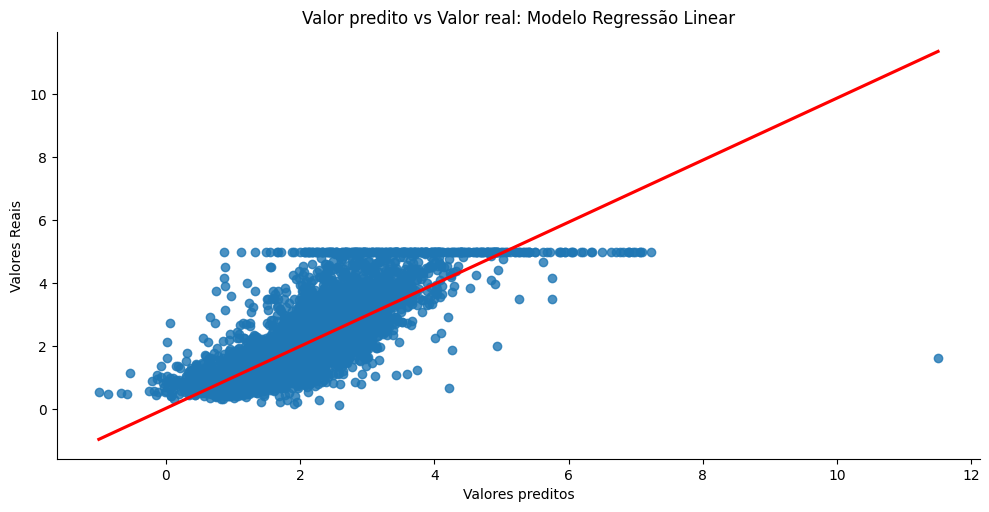

In [21]:
grafico_regressao(y_reg_pred, 'Regressão Linear')

## Lasso

### Hiperparâmetros modificados:
 - **Alpha**: Constante que multiplica o termo L1 da equação, controlando a força da regularização dos pesos. Um alpha de 0 equivale a utilizar o modelo de regressão linear.
 - **Max_iter**: Quantidade máxima de iterações do modelo.
 - **Tol**: Representa a tolerância da otimização do modelo. Serve para assumir um número que será usado para verificar melhora de uma iteração em relação a iteração anterior. Caso a melhora seja menor do que esse número, o modelo não realiza mais iterações.

In [22]:
lasso = linear_model.Lasso(random_state=42)
params_lasso = {'alpha':[0.1, 0.5, 1, 10, 100], 'max_iter':[1000, 3000, 5000], 'tol': [0.0001, 0.001, 0.01, 0.1]}
search_lasso = GridSearchCV(lasso, params_lasso, cv=5)
search_lasso.fit(X_train, y_train)
print(search_lasso.best_estimator_)

Lasso(alpha=0.1, random_state=42)


In [23]:
lasso_final = linear_model.Lasso(alpha=0.1, random_state=42)

In [24]:
%%time
lasso_final.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 5 ms


Lasso(alpha=0.1, random_state=42)

In [108]:
tempo_lasso = 5

In [25]:
y_lasso_pred = lasso_final.predict(X_test)

In [58]:
metricas2 = metricas(y_test, y_lasso_pred, 'Lasso')
metricas2

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2)
Lasso,1.258543,1.121848,0.887534,0.60957,0.041139


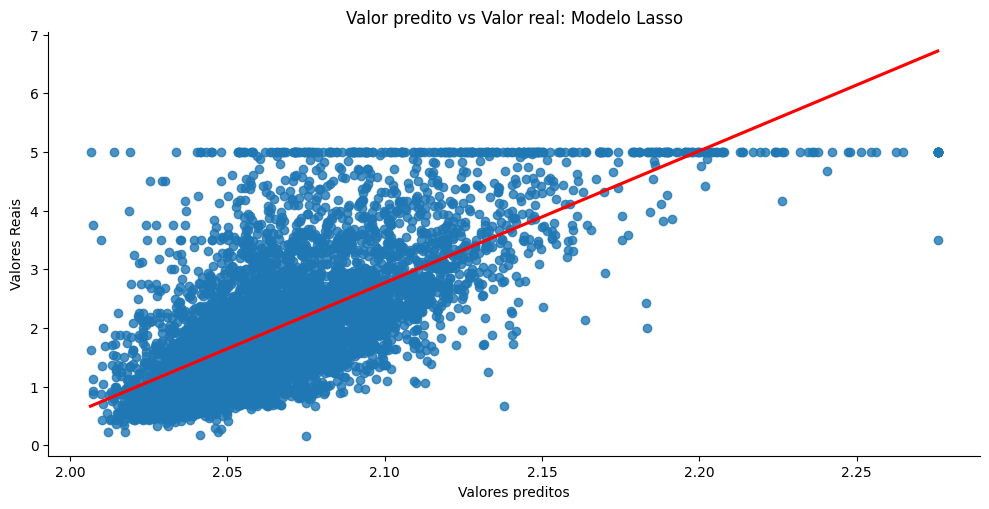

In [27]:
grafico_regressao(y_lasso_pred, 'Lasso')

## Ridge

### Hiperparâmetros modificados:
 - **Alpha**: Constante que multiplica o termo L2 da equação, controlando a força da regularização dos pesos. Um alpha de 0 equivale a utilizar o modelo de regressão linear.
 - **Max_iter**: Quantidade máxima de iterações do modelo.
 - **Tol**: Representa a tolerância da otimização do modelo. Serve para assumir um número que será usado para verificar melhora de uma iteração em relação a iteração anterior. Caso a melhora seja menor do que esse número, o modelo não realiza mais iterações.

In [28]:
ridge = linear_model.Ridge(random_state=42)
params_ridge = {'alpha':[0.1, 0.5, 1, 10, 100], 'max_iter':[1000, 3000, 5000], 'tol': [0.0001, 0.001, 0.01, 0.1]}
search_ridge = GridSearchCV(ridge, params_ridge, cv=5)
search_ridge.fit(X_train, y_train)
print(search_ridge.best_estimator_)

Ridge(alpha=0.1, max_iter=1000, random_state=42)


In [28]:
ridge_final = linear_model.Ridge(alpha=0.1, max_iter=1000, random_state=42)

In [29]:
%%time
ridge_final.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 6.01 ms


Ridge(alpha=0.1, max_iter=1000, random_state=42)

In [109]:
tempo_ridge = 6.01

In [30]:
y_ridge_pred = ridge_final.predict(X_test)

In [59]:
metricas3 = metricas(y_test, y_ridge_pred, 'Ridge')
metricas3

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2)
Ridge,0.526199,0.725396,0.528944,0.318598,0.599099


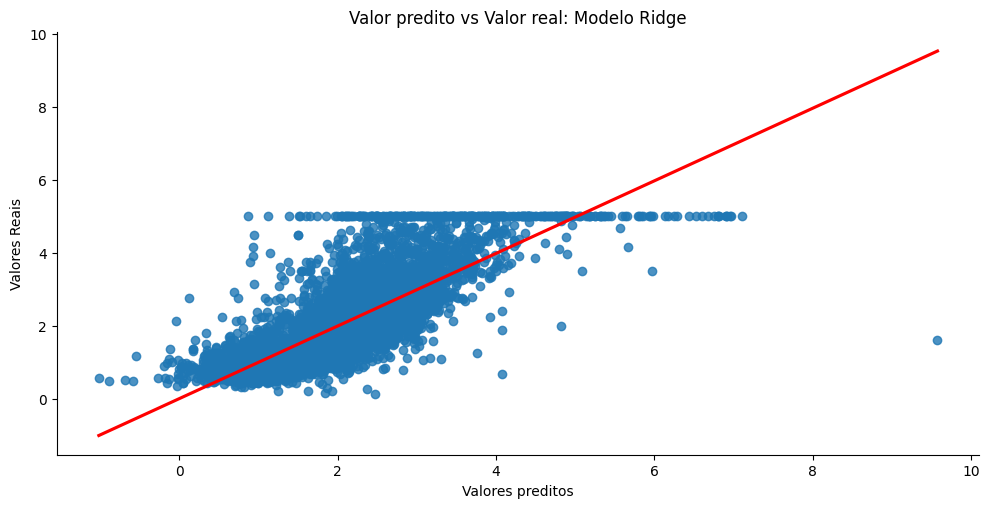

In [33]:
grafico_regressao(y_ridge_pred, 'Ridge')

## Elastic Net

### Hiperparâmetros modificados:
 - **Alpha**: Constante que multiplica os termos L1 e L2 da equação, controlando a força da regularização dos pesos. Um alpha de 0 equivale a utilizar o modelo de regressão linear.
 - **l1_ratio**: Número entre 0 e 1 que multiplica o alpha e o termo L1 e L2. Essa taxa serve para ajustar o balanceamentos dos termos de regularização, de modo que se o l1_ratio for de 0.8, por exemplo, o modelo dará um peso maior para a regularização L1, sobrando 0.2 para a regularização L2. Caso o valor de l1_ratio seja 1, equivale a usar o modelo de regresão lasso e, caso o valor seja 0, equivale a utilizar o modelo de regressão ridge.
 - **Max_iter**: Quantidade máxima de iterações do modelo.
 - **Tol**: Representa a tolerância da otimização do modelo. Serve para assumir um número que será usado para verificar melhora de uma iteração em relação a iteração anterior. Caso a melhora seja menor do que esse número, o modelo não realiza mais iterações.

In [34]:
elastic = linear_model.ElasticNet(random_state=42)
params_elastic = {'alpha':[0.1, 0.5, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9], 'max_iter':[1000, 3000, 5000], 'tol': [0.0001, 0.001, 0.01, 0.1]}
search_elastic = GridSearchCV(elastic, params_elastic, cv=5)
search_elastic.fit(X_train, y_train)
print(search_elastic.best_estimator_)

ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)


In [33]:
elastic_final = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)

In [34]:
%%time
elastic_final.fit(X_train,y_train)

CPU times: total: 31.2 ms
Wall time: 6.01 ms


ElasticNet(alpha=0.1, l1_ratio=0.1, random_state=42)

In [110]:
tempo_elastic = 6.01

In [35]:
y_elastic_pred = elastic_final.predict(X_test)

In [60]:
metricas4 = metricas(y_test, y_elastic_pred, 'Elastic Net')
metricas4

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2)
Elastic Net,1.121317,1.058923,0.838154,0.573563,0.145689


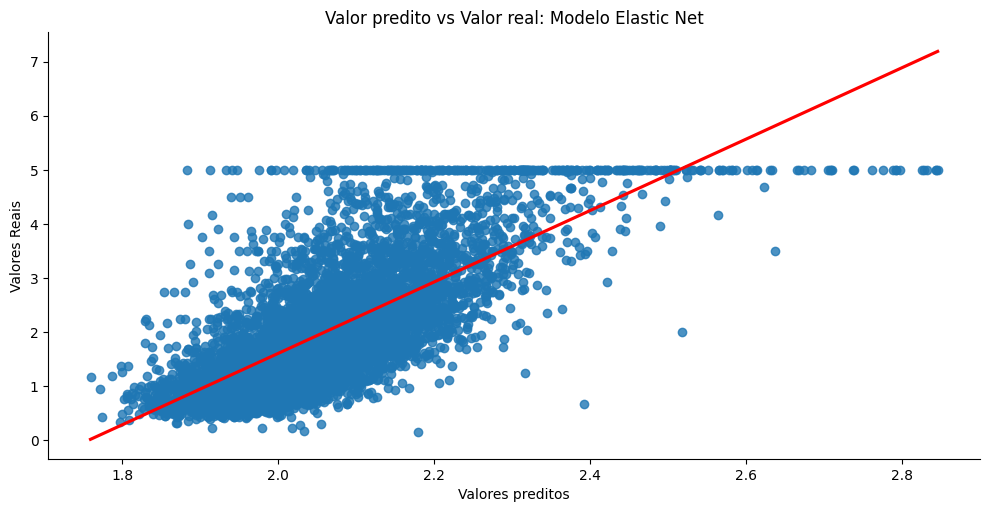

In [39]:
grafico_regressao(y_elastic_pred, 'Elastic Net')

## Árvore de Regressão

### Hiperparâmetros modificados:
 - **Criterion**: Usado para selecionar a métrica que será utilizada para ajudar a decidir como os nós da árvore serão dividios, medindo a qualidade da divisão.
 - **Max_depth**: Número máximo de profundidade da árvore. Uma profundidade muito alta pode levar ao overfitting e uma profundidade muito baixa, underfitting.
 - **Min_samples_split**: Número mínimo de amostras necessárias para que o algoritmo continue com os calculos e continue formando nós e divisões. 
 - **Min_samples_leaf**: Número mínimo de amostras necessárias para estar numa folha de um nó. O modelo só realiza novas divisões caso esse número mínimo de amostras esteja presente em cada um dos ramos do nó.

In [45]:
dtr = DecisionTreeRegressor(random_state=42)
params_dtr = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': [4, 6, 8, 10, 12,], 'min_samples_split': [5, 10, 15, 20], 'min_samples_leaf': [5, 8, 11, 14, 17]}
search_dtr = RandomizedSearchCV(dtr, params_dtr, cv=5, n_iter=100)
search_dtr.fit(X_train, y_train)
print(search_dtr.best_estimator_)

DecisionTreeRegressor(criterion='poisson', max_depth=12, min_samples_leaf=17,
                      min_samples_split=5, random_state=42)


In [96]:
dtr_final = DecisionTreeRegressor(criterion='poisson', max_depth=12, min_samples_leaf=17, min_samples_split=5, random_state=42)

In [103]:
%%time
dtr_final.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 104 ms


DecisionTreeRegressor(criterion='poisson', max_depth=12, min_samples_leaf=17,
                      min_samples_split=5, random_state=42)

In [111]:
tempo_arvore = 104

In [40]:
y_dtr_pred = dtr_final.predict(X_test)

In [61]:
metricas5 = metricas(y_test, y_dtr_pred, 'Árvore')
metricas5

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2)
Árvore,0.360802,0.600668,0.398861,0.226706,0.725111


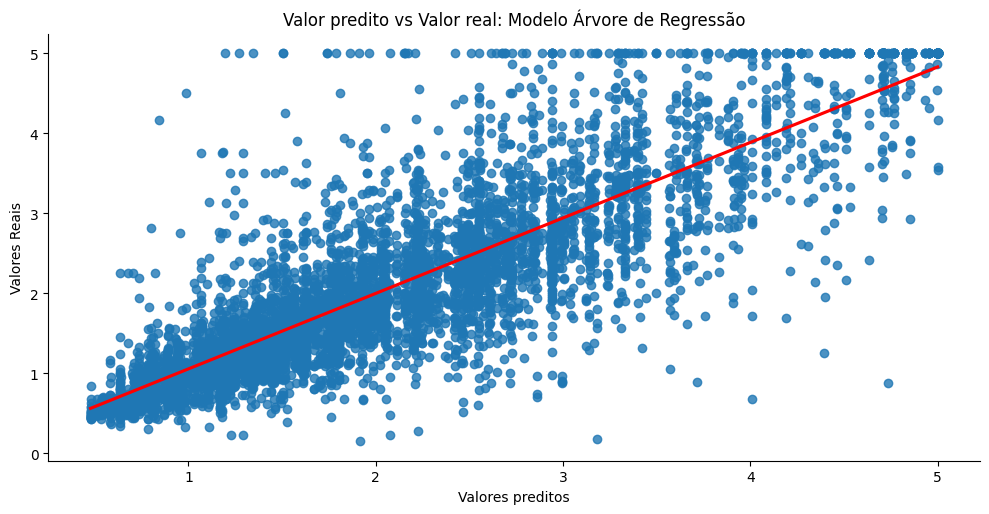

In [53]:
grafico_regressao(y_dtr_pred, 'Árvore de Regressão')

## SVM

### Hiperparâmetros modificados:
 - **Kernel**: Especifica o kernel que será utilizado. Basicamente, serve para que o algoritmo consiga mapear os dados em dimensões maiores, buscando sempre o melhor hiperplano para a separação das classes. A definição do kernel pode levar ao overfitting, dependendo dos valores escolhidos para as variáveis das equações dos kernels não lineares.
 - **Degree**: Representa o grau do polinômio do kernel 'poly'.
 - **C**: Constante que multiplica o valor da regularização. Caso o C seja um valor muito alto, pode resultar em overfitting, e caso seja um valor muito baixo, pode resultar em underfitting.
 - **Epsilon**: Tamanho do canal do svm onde nenhuma punição é aplicada.

In [70]:
svc = SVR()
params_svc = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 2, 5, 7], 'degree': [3, 4, 5], 'epsilon': [0.2, 0.4, 0.6, 0.8]}
search_svc = RandomizedSearchCV(svc, params_svc, cv=5, n_iter=100)
search_svc.fit(X_train, y_train)
print(search_svc.best_estimator_)

SVR(C=7, degree=5, epsilon=0.4)


In [43]:
svm_final = SVR(C=7, epsilon=0.4)

In [44]:
%%time
svm_final.fit(X_train, y_train)

CPU times: total: 3.27 s
Wall time: 3.27 s


SVR(C=7, epsilon=0.4)

In [106]:
tempo_svm = 327000

In [45]:
y_svm_pred = svm_final.predict(X_test)

In [62]:
metricas6 = metricas(y_test, y_svm_pred, 'SVM')
metricas6

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2)
SVM,0.423428,0.650713,0.449263,0.250841,0.677398


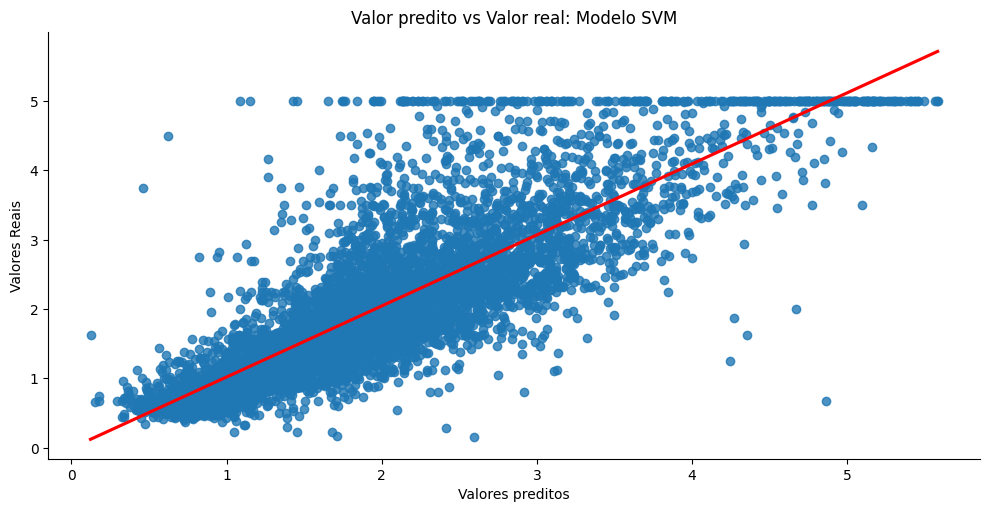

In [92]:
grafico_regressao(y_svm_pred, 'SVM')

## KNN

### Hiperparâmetros modificados:
 - **n_neighbors**: Quantidade de vizinhos que serão analisados para classificar o dado. Valores muito altos para K podem resultar em overfitting e valores muito baixos podem resultar em underfitting.
 - **Metric**: Define qual distância será utilizada para realizar os calculos.
 - **P**: Valor do expoente utilizado por algumas distâncias. Caso P for igual a 1, a distância padrão do algoritmo (minkowski) equivale a distância manhattan, e quando P for igual a 2, equivale a distância euclidiana. Portanto, ao dar opções de valores P que passem pelos valores 1 e 2, é possível dar a opção de apenas duas distâncias no hiperparâmetro metric, sendo elas a minkowski e a chebyshev, por exemplo. Com isso, o algoritmo estará testando, na prática, quatro distâncias diferentes.

In [60]:
knn = KNeighborsRegressor()
params_knn = {'metric': ['minkowski', 'chebyshev'], 'n_neighbors': [5, 7, 9, 11, 13, 15], 'p': [1, 2, 3, 4]}
search_knn = GridSearchCV(knn, params_knn, cv=5)
search_knn.fit(X_train, y_train)
print(search_knn.best_estimator_)

KNeighborsRegressor(n_neighbors=9, p=1)


In [48]:
knn_final = KNeighborsRegressor(n_neighbors=9, p=1)

In [49]:
%%time
knn_final.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 26 ms


KNeighborsRegressor(n_neighbors=9, p=1)

In [112]:
tempo_knn = 26

In [50]:
y_knn_pred = knn_final.predict(X_test)

In [63]:
metricas7 = metricas(y_test, y_knn_pred, 'KNN')
metricas7

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2)
KNN,0.360319,0.600265,0.402279,0.218482,0.72548


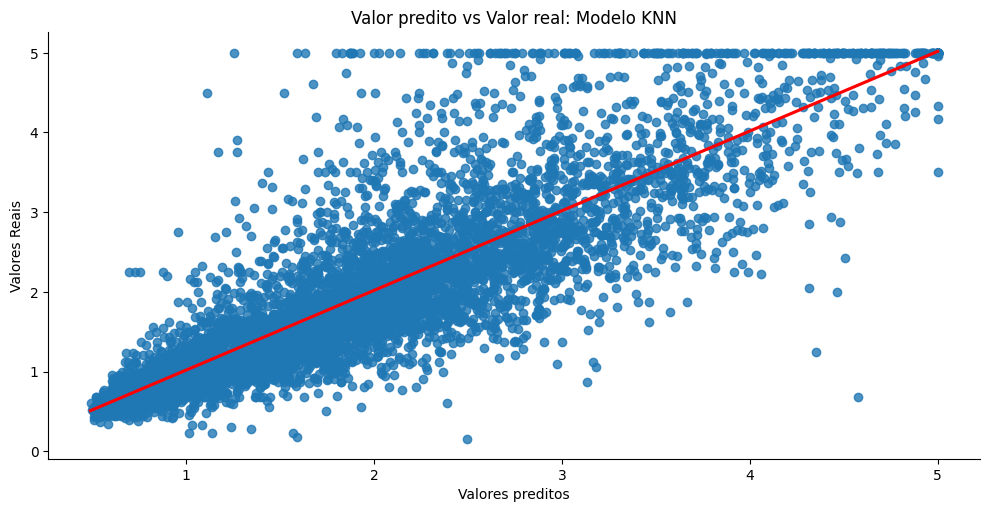

In [69]:
grafico_regressao(y_knn_pred, 'KNN')

# Escolha do Modelo

In [114]:
metricas_list = [metricas1, metricas2, metricas3, metricas4, metricas5, metricas6, metricas7]
duracao = [tempo_reg, tempo_lasso, tempo_ridge, tempo_elastic, tempo_arvore, tempo_svm, tempo_knn]
result_df = pd.concat(metricas_list)
result_df['Duracao (ms)'] = duracao
result_df.sort_values(by="R-squared (R2)", ascending=False)

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-squared (R2),Duracao (ms)
KNN,0.360319,0.600265,0.402279,0.218482,0.725480,26.00
Árvore,0.360802,0.600668,0.398861,0.226706,0.725111,104.00
SVM,0.423428,0.650713,0.449263,0.250841,0.677398,327000.00
Ridge,0.526199,0.725396,0.528944,0.318598,0.599099,6.01
Reg_linear,0.530568,0.728401,0.527247,0.317503,0.595770,6.01
Elastic Net,1.121317,1.058923,0.838154,0.573563,0.145689,6.01
Lasso,1.258543,1.121848,0.887534,0.609570,0.041139,5.00


### Os modelos de Lasso e Elastic Net performaram muito abaixo dos demais modelos, não sendo viáveis para essa aplicação. Além disso, os modelos de Regressão Linear e Ridge são um empate técnico, mas suas métricas estão abaixo dos modelos de Árvore, SVM e KNN. O modelo SVM se aproxima dos modelos de Árvore e KNN, mas demora incriveis 3.27s para o fit e possui métricas bem piores.

## Comparando os modelos de Árvore de Regressão e KNN
### O modelos KNN e Árvore de regressão possuem métricas muito parecidas, sendo um empate técnico ao comparar cada uma. Ambos explicam cerca de 72% dos dados, de acordo com o R² desses modelos e ambos possuem erros consideravelmente menores em relação aos outros modelos.
### Com isso, o modelo escolhido para esta aplicação é o modelo KNN. Como todas as suas métricas são empatadas com as métricas do modelo de árvore, o principal fator que faz com que esse modelo seja escolhido é o custo computacional. O modelo KNN teve um wall-time de 26ms, que é 4x menor que o do modelo de árvore.